# <center>K-Medias Clustering</center>

# k-Media en un dataset generado aleatoriamente

¡Creemos nuestro propio dataseet para este lab!


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_blobs

Necesitamos primero configurar una semilla aleatoria(random seed). Utilizaremos la función <b>numpy's random.seed()</b>, donde la semilla se establecerá con el valor <b>0</b>

In [4]:
np.random.seed(0)

Luego, haremos <i> clusters aleatorios </i> de puntos usando la clase <b> make_blobs </b>. La clase <b> make_blobs </b> puede aceptar varias entradas, pero estaremos usando concretamente estas. <br> <br> <b> <u> Entrada </u> </b>

<ul>
    <li> <b>n_samples</b>: El número total de puntos equitativamente divididos entre los clusters. </li>
    <ul> <li> El valor será: 5000 </li> </ul>
    <li> <b>centers</b>: El número de centros a generar. </li>
    <ul> <li> El valor será: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: El desvío estándar de los clusters. </li>
    <ul> <li> El valor será: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Salida </u> </b>
<ul>
    <li> <b>X</b>: Arreglo de la forma [n_samples, n_features]. (Matríz de Distancia)</li>
    <ul> <li> Muestras generadas. </li> </ul> 
    <li> <b>y</b>: Arreglo de la forma [n_samples]. (Response Vector)</li>
    <ul> <li> Las etiquetas de números enteros para la pertenencia de cluster en cada muestra. </li> </ul>
</ul>

In [5]:
X, y = make_blobs(n_samples = 5000, centers = [[4,4], [-2,-1], [2,-3], [1,1]], cluster_std = 0.9)

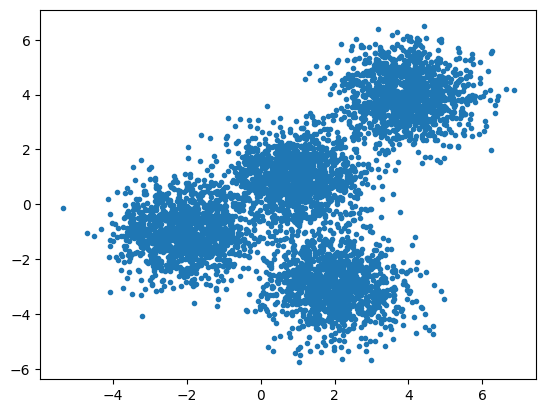

In [7]:
plt.scatter(X[:, 0], X[:, 1], marker = '.')

## Estableciendo K-Medias

Ahora que tenemos nuestros datos aleatorios, configuremos nuestro Clustering K-Medias.

La clase KMedias tiene muchos parámetros que se pueden utilizar, pero estaremos usando estos tres:

<ul>
    <li> <b>init</b>: Método de inicialización de los centroides. </li>
    <ul>
        <li> El valor será: "k-means++" </li>
        <li> k-means++: Elije centros de clusters iniciales eficientes para el clustering k-media de forma tal de acelerar la convergencia.</li>
    </ul>
    <li> <b>n_clusters</b>: El número de clusters a formar y la cantidad de centroides a generar. </li>
    <ul> <li> El valor será: 4 (tenemos 4 centros)</li> </ul>
    <li> <b>n_init</b>: Cantidad de veces que el algoritmo k-medias se ejecutará con diferentes semillas centroides. El resultado final será la mejor salida de consecutivas ejecuciones de n_init en términos de inercia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Inicializar KMedias con estos parámetros, donde el parámetro de salida se llama <b>k_means</b>.

In [8]:
from sklearn.cluster import KMeans
k_means = KMeans(init = 'k-means++', n_clusters = 4, n_init = 12)

In [9]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Ahora juntemos las etiquetas de cada punto en el modelo usando el atributo de KMedias <b> .labels\_ </b> y lo guardamos como <b> k_means_labels </b>


In [10]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

También obtendremos las coordenadas de los centros del cluster usando KMedias <b> .cluster_centers\_ </b> y guardémoslo en <b> k_means_cluster_centers </b>

In [11]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

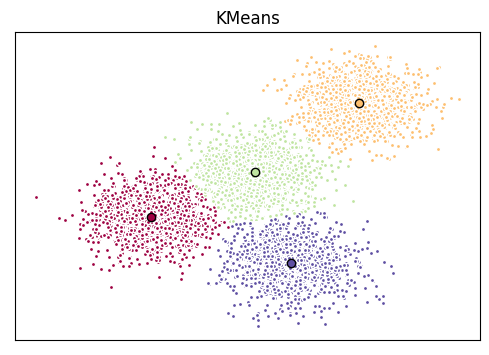

In [12]:
# Inicializar el dibujo con las dimensiones especificadas.
fig = plt.figure(figsize=(6, 4))

# Los colores usan un mapa de color, dónde produciremos un arreglo de colores basados en
# el número de etiquetas que hay. Usaremos set(k_means_labels) para obtener
# etiquetas unívocas.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Crear un dibujo
ax = fig.add_subplot(1, 1, 1)

# Loop For que dibuja los puntos de datos y los centroides.
# k tomará valores entre 0-3, los cuales coincidirán con los clusters posibles en el
# que está cada punto.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Crear una lista de todos los puntos, donde aquellos que están 
    # en el cluster (ej. cluster 0) están etiquetados como verdadero, o en su defecto
    # estarán etiquetados como falso.
    my_members = (k_means_labels == k)
    
    # Definir el centroide o centro del cluster.
    cluster_center = k_means_cluster_centers[k]
    
    # Dibjuar los puntos de datos con color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Dibujo de los centroides con un color específico pero una linea más oscura
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Título del dibujo
ax.set_title('KMeans')

# Eliminar los ticks del eje x
ax.set_xticks(())

# Eliminar los ticks del eje y
ax.set_yticks(())

# Mostrar el dibujo
plt.show()